In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Import Libraries**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif  # for Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  # for evaluation
from sklearn.linear_model import LogisticRegression

# **2. Data Loading and Data Analysis**

### Load Data

In [81]:
# dataset load
df = pd.read_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_encoded.csv')

### Display basic info

In [82]:
print("Dataset shape:", df.shape)
print(f"We have {df.shape[0]} Survey responses and {df.shape[1]} Features")


print('First 3 rows of the dataset:')
display(df.head(3))

print('Last 3 rows of the dataset:')
display(df.tail(3))

Dataset shape: (1254, 51)
We have 1254 Survey responses and 51 Features
First 3 rows of the dataset:


,Timestamp,Age,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,mental_health_consequence,...,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender_Clean_female,Gender_Clean_male,Gender_Clean_other
0,2014-08-27 11:29:31,37,0,1,3,1,0,1,2,0,...,True,False,False,True,False,False,True,True,False,False
1,2014-08-27 11:29:37,44,0,0,1,5,0,0,-1,1,...,False,True,False,False,True,False,False,False,True,False
2,2014-08-27 11:29:44,32,0,0,1,1,0,1,1,0,...,False,True,False,False,False,True,False,False,True,False


Last 3 rows of the dataset:


,Timestamp,Age,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,mental_health_consequence,...,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender_Clean_female,Gender_Clean_male,Gender_Clean_other
1251,2015-11-07 12:36:58,34,1,1,2,5,0,1,1,2,...,False,True,False,False,False,True,False,False,True,False
1252,2015-11-30 21:25:06,46,0,0,-1,3,1,1,-1,2,...,False,True,False,False,False,True,False,True,False,False
1253,2016-02-01 23:04:31,25,1,1,2,2,0,0,-1,1,...,False,False,False,True,True,False,False,False,True,False


### Table to understand our data better

In [83]:
# summary table
data_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': round((df.isnull().sum() / len(df)) * 100, 2),
    'Unique_Values': df.nunique()
})
data_info.set_index(np.arange(len(df.columns)), inplace=True)

display(data_info)

,Column,Data_Type,Missing_Count,Missing_Percentage,Unique_Values
0,Timestamp,object,0,0.0,1242
1,Age,int64,0,0.0,48
2,family_history,int64,0,0.0,2
3,treatment,int64,0,0.0,2
4,work_interfere,int64,0,0.0,5
5,no_employees,int64,0,0.0,6
6,remote_work,int64,0,0.0,2
7,tech_company,int64,0,0.0,2
8,leave,int64,0,0.0,5
9,mental_health_consequence,int64,0,0.0,3


### Target Variable Distribution Analysis

In [84]:
print(df['treatment'].value_counts(normalize=True)) # target variable distribution
print("1 = Sought treatment, 0 = Did not seek treatment")

treatment
1    0.504785
0    0.495215
Name: proportion, dtype: float64
1 = Sought treatment, 0 = Did not seek treatment


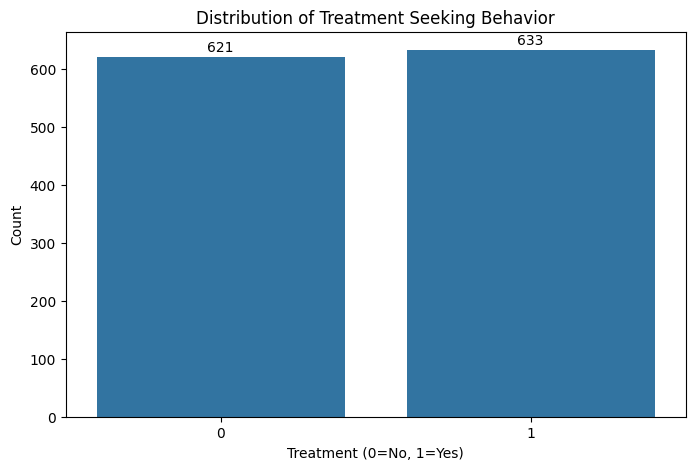

In [85]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='treatment', data=df)
plt.title('Distribution of Treatment Seeking Behavior')
plt.xlabel('Treatment (0=No, 1=Yes)')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center')
plt.show()

### Quality Checks on Data

In [86]:
print("Duplicates:" , df.duplicated().sum())
print("Null Values: ", df.isnull().sum().sum())

Duplicates: 0
Null Values:  0


# **3. Removing Features**

In [87]:
# Age_standardized is better than Age, so we keep the standardized version
# Timestamp is not useful for prediction
df_clean = df.drop(['Age', 'Timestamp'], axis=1)

In [88]:
print(f"New shape: {df_clean.shape}")

New shape: (1254, 49)


# **4. Creating New Features (Engineering Features)**

In [89]:
# for safety create copy
df_engineered = df_clean.copy()

### Combines the features which are related to 'support facilities' in the workplace and assign an average score

In [92]:
# 0 = No support, 1 = Full support"
workplace_support_features = ['benefits_Yes', 'care_options_Yes', 'wellness_program_Yes', 'seek_help_Yes']
df_engineered['workplace_support_score'] = (
    df_engineered['benefits_Yes'].astype(int) +
    df_engineered['care_options_Yes'].astype(int) +
    df_engineered['wellness_program_Yes'].astype(int) +
    df_engineered['seek_help_Yes'].astype(int)
) / 4.0 # average score

print(df_engineered['workplace_support_score'].value_counts().sort_index())

workplace_support_score
0.00    588
0.25    262
0.50    192
0.75    103
1.00    109
Name: count, dtype: int64


### Combine the features related to 'stigma' or 'judgement' of admitting to having mental health issues

In [93]:
# we combine the features related to 'stigma' or 'judgement' of admitting to having mental health issues
df_engineered['stigma_score'] = (df_engineered['mental_health_consequence'] +
    (2 - df_engineered['coworkers']) +  # after reverse the scale: 2=uncomfortable, 0=comfortable
    (2 - df_engineered['supervisor'])   # to reverse the scale: 2=uncomfortable, 0=comfortable
) / 3.0  # average score

In [94]:
print(df_engineered['stigma_score'].value_counts().sort_index())

stigma_score
0.000000    154
0.333333    238
0.666667    203
1.000000    197
1.333333    194
1.666667    147
2.000000    121
Name: count, dtype: int64


### Interaction features

In [118]:
#flag to mark high risk individuals
df_engineered['family_work_risk'] = df_engineered['family_history'] * (df_engineered['work_interfere'] > 0).astype(int)

In [117]:
df_engineered['family_work_risk'].value_counts()

,count
family_work_risk,
0,845
1,409


Family history = genetic risk

Work interfere = stress at work

Having both together = much higher risk of mental health issues

### Overall Mental Health Risk Score

In [98]:
df_engineered['mental_health_risk_score'] = (
    df_engineered['family_history'] +
    df_engineered['work_interfere'] +
    df_engineered['stigma_score'] +
    (1 - df_engineered['workplace_support_score'])  # reverse it
)

In [101]:
print(f"initial features: {df_clean.shape[1]}")
print(f"Features after engineering: {df_engineered.shape[1]}")
print(f"Number of New features added: {df_engineered.shape[1] - df_clean.shape[1]}")

initial features: 49
Features after engineering: 53
Number of New features added: 4


# **5. Feature Selection**

### 1. Prepare data

In [102]:
target = 'treatment'
X = df_engineered.drop(columns=[target])  # Drop target
y = df_engineered[target]

print(f"Features we can choose from: {X.shape[1]}")

Features we can choose from: 52


### 2. Variance Threshold -> Remove features with very low variance (0.01 means almost constant )

In [103]:
# Define variance threshold
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

# Apply only to numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
selector.fit(X[numerical_cols])

# Get columns that pass variance threshold
selected_mask = selector.get_support()
print(f"Features kept: {sum(selected_mask)} out of {len(numerical_cols)}")

Features kept: 18 out of 18


### 3. Mutual Information -> information each feature provides about the target

Top 20 feature by Mutual Information:
work_interfere              0.268361
mental_health_risk_score    0.250147
family_work_risk            0.135196
family_history              0.071828
workplace_support_score     0.052459
benefits_Don't know         0.045711
benefits_Yes                0.031780
anonymity_Don't know        0.025645
Gender_Clean_female         0.022364
Country_India               0.022202
Country_United States       0.021813
Gender_Clean_male           0.021043
Gender_Clean_other          0.017777
phys_health_consequence     0.017019
tech_company                0.016553
Country_France              0.016355
Age_standardized            0.016337
Country_Netherlands         0.016089
self_employed_Yes           0.015750
obs_consequence             0.014592
dtype: float64


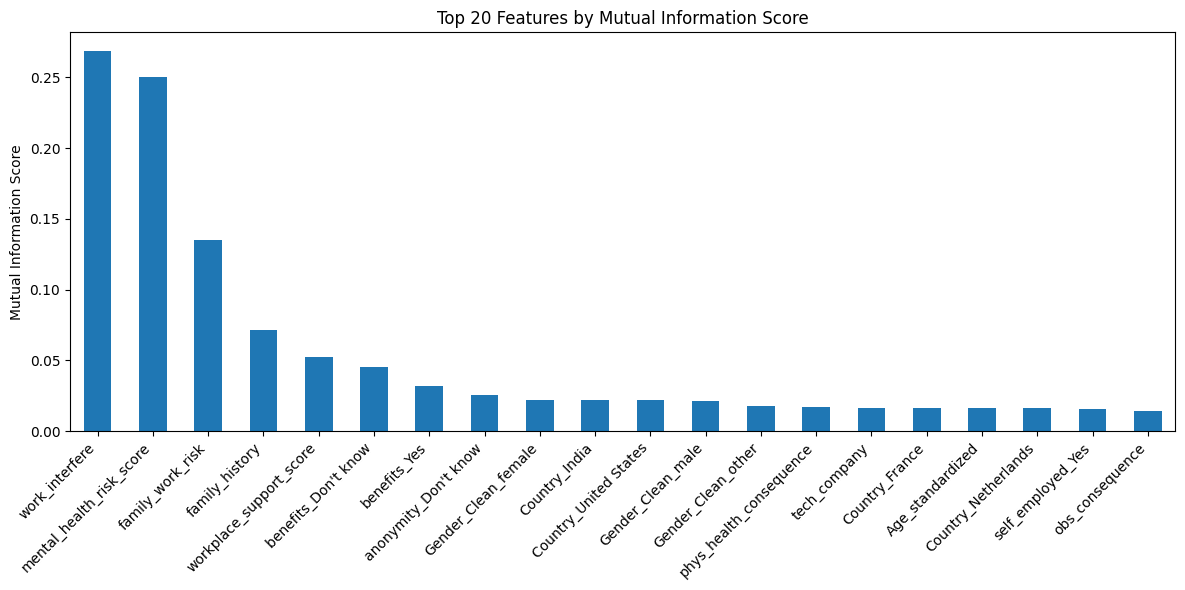

In [104]:
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Top 20 feature by Mutual Information:")
print(mi_series.head(20))

# Plot MI scores for top features
plt.figure(figsize=(12, 6))
mi_series.head(20).plot.bar()
plt.title("Top 20 Features by Mutual Information Score")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. RandomForest Feature importance

Top 15 features by Random Forest Importance:
work_interfere               0.208680
mental_health_risk_score     0.171715
family_work_risk             0.066718
Age_standardized             0.050893
family_history               0.034172
no_employees                 0.029049
stigma_score                 0.028744
workplace_support_score      0.027520
care_options_Yes             0.023235
leave                        0.022336
phys_health_interview        0.018086
coworkers                    0.017929
supervisor                   0.017261
mental_health_consequence    0.015627
Gender_Clean_female          0.011664
dtype: float64


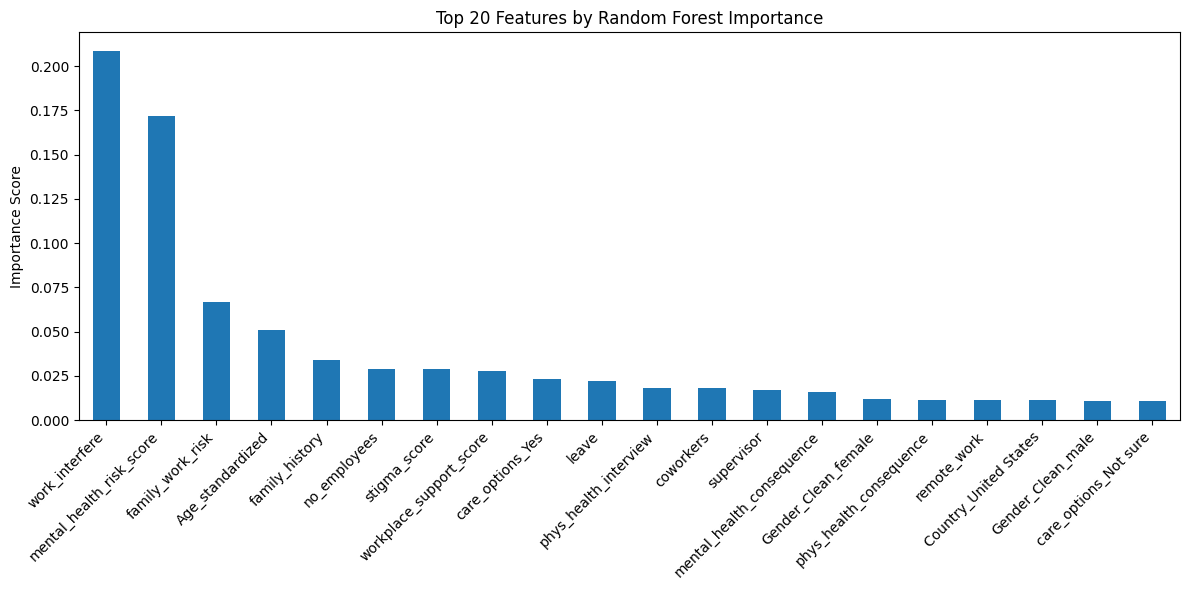

In [105]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top 15 features by Random Forest Importance:")
print(rf_importances.head(15))

# Plot RF importance for top features
plt.figure(figsize=(12, 6))
rf_importances.head(20).plot(kind='bar')
plt.title('Top 20 Features by Random Forest Importance')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5. Let us now combine them to get best features from both (using set intersect method)

In [106]:
# Get top features from each method
top_mi_features = set(mi_series.head(20).index)
top_rf_features = set(rf_importances.head(20).index)

In [107]:
# Features that appear in both
combined_features = top_mi_features.intersection(top_rf_features)
print(f"Num of Features selected by BOTH methods: {len(combined_features)}")
print(list(combined_features))

Num of Features selected by BOTH methods: 10
['Gender_Clean_female', 'mental_health_risk_score', 'Country_United States', 'Gender_Clean_male', 'phys_health_consequence', 'workplace_support_score', 'family_work_risk', 'family_history', 'Age_standardized', 'work_interfere']


In [108]:
df_final = df_engineered[list(combined_features) + [target]]

In [109]:
print(f"Final dataset shape: {df_final.shape}")

Final dataset shape: (1254, 11)


# **Final Analysis**

### 1. Analyzing Correlations in Dataset

In [110]:
corr_matrix = df_final.drop(columns=[target]).corr()

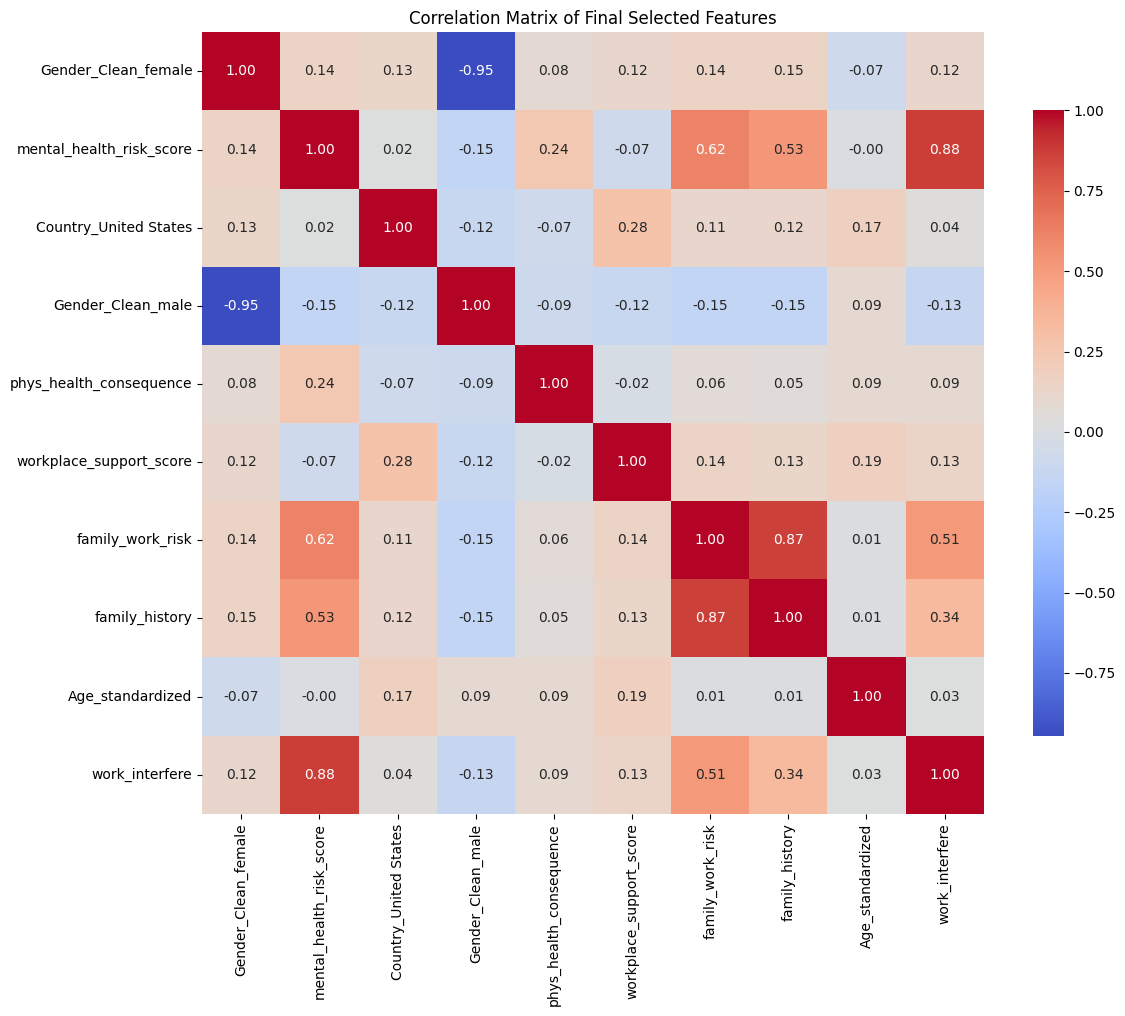

In [111]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Final Selected Features')
plt.tight_layout()
plt.show()

In [112]:
df_final.to_csv(r'/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_final_features.csv', index=False)

**Highly correlated feature pairs (>0.8):**
- Gender_Clean_female vs Gender_Clean_male: -0.95
- mental_health_risk_score vs work_interfere: 0.88
- family_history vs family_work_risk: 0.87

# **PCA**

### We will skip PCA due to the following reasons:
### 1. Interpretability: Healthcare models need to be interpretable
### 2. only have few features (manageable without PCA)


# **Evaluation**

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X_final = df_final.drop('treatment', axis=1)
y_final = df_final['treatment']
lr = LogisticRegression(random_state=42, max_iter=1000)
cv_scores = cross_val_score(lr, X_final, y_final, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean().round(4)}")

Cross-validation accuracy: 0.8253
